## Plot refueling station costs for varying dehydrogenation catalyst lifetimes

### IMPORT MODULES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# update plot formatting
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'mathtext.default': 'rm'})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams.update({'font.sans-serif': 'Calibri'})

### USER INPUT

In [3]:
# output folders
# catalyst lifetime (years) : folder name
folders = {
    # '1 yr' : 'outputs 2024-08-09 multi catal',
    '3 yrs': 'outputs 2024-08-09 multi catal 3yr',
    '5 yrs' : 'outputs 2024-08-09 multi catal 5yr',
    '10 yrs' : 'outputs 2024-08-09 multi catal 10yr',
}

In [4]:
# user-defined input parameter names for plots
input_params_varied_user = [
    'scenario', 
    'dehydr. reaction temperature (K)', 
    'dehydr. reaction pressure (bar)',
    ]

In [5]:
# dehydr. pressures to plot
dehydr_pres_bar_to_plot = [1.0, 100.0]

In [6]:
# define colors (and order) for catalysts
colors_catal = {
    'Pd' : '#7570b3',
    'Pt' : '#d95f02',
    'Cu' : '#1b9e77',
    }

# define line styles (and order) for pressures
linestyles_pres = {
    dehydr_pres_bar_to_plot[0] : 'solid',
    dehydr_pres_bar_to_plot[1] : 'dashed',
    }

### READ INPUT PARAMETERS

In [7]:
# read input parameter map
df_input_params = pd.read_csv(
    os.path.join('..\outputs', folders[list(folders)[0]], 'input params.csv'),
    index_col = 'run #'
    )

# drop "default" results
df_input_params = df_input_params.loc[df_input_params.index != 0]

# extract output dollar year
output_dollar_year = df_input_params['output dollar year'].values[0]

In [8]:
# read varied input parameters
df_input_params_varied_all = pd.read_csv(
    os.path.join('..\outputs', folders[list(folders)[0]], 'input params_varied.csv'), 
    index_col = 'run #'
    )

# create dataframe of input parameters to plot
df_input_params_varied_plot = df_input_params_varied_all.copy()

# use user-defined input parameters for plots if not empty
if input_params_varied_user:
    df_input_params_varied_plot = \
        df_input_params_varied_all[input_params_varied_user]

In [9]:
# create dataframe of input parameters to plot
df_input_params_varied_plot = df_input_params_varied_all.copy()

# use user-defined input parameters for plots if not empty
if input_params_varied_user:
    df_input_params_varied_plot = \
        df_input_params_varied_all[input_params_varied_user]
    
df_input_params_varied_plot

,scenario,dehydr. reaction temperature (K),dehydr. reaction pressure (bar)
run #,,,
0,baseline,300.000000,1.0
1,Pd 4nm,300.000000,1.0
2,Pd 4nm,310.526316,1.0
3,Pd 4nm,321.052632,1.0
4,Pd 4nm,331.578947,1.0
5,Pd 4nm,342.105263,1.0
6,Pd 4nm,352.631579,1.0
7,Pd 4nm,363.157895,1.0
8,Pd 4nm,373.684211,1.0


### DATA PROCESSING: total refueling station cost

In [10]:
# filename to read
f = 'output_all runs_refueling station costs.csv'

list_dfs = []

for life_yrs, folder in folders.items():

    # read csv
    df_stn = pd.read_csv(
        os.path.join('..\outputs', folder, f), 
        index_col = 'run #'
        )
    
    # merge in varied input parameters
    df_stn = df_input_params_varied_plot.merge(
        right = df_stn, 
        on='run #', 
        how = 'right'
        )
    
    # drop "default" results
    df_stn = df_stn.loc[df_stn.index != 0]

    #----------------------------------------------------------------------------------------------
    # filter results by units
    df_stn_usd_per_kg = df_stn.loc[df_stn['unit'] == '$/kg H2'].copy()

    #----------------------------------------------------------------------------------------------
    # calculate total refueling station costs 
    # as a function of temperature and pressure
    df_stn_tot = df_stn_usd_per_kg.groupby(
        by = df_input_params_varied_plot.columns.tolist()
        )['value'].sum().reset_index()
    
    # rename columns
    df_stn_tot.rename(
        columns = {
            'value' : '$/kg H2'
            }, 
        inplace = True
        )
    
    # convert temperature to deg.C
    df_stn_tot['dehydr. reaction temperature (C)'] = \
        df_stn_tot['dehydr. reaction temperature (K)'] - 273.15

    #----------------------------------------------------------------------------------------------
    # filter total station cost results by pressure
    df_stn_tot_pres = df_stn_tot.loc[
        df_stn_tot['dehydr. reaction pressure (bar)'].isin(
            dehydr_pres_bar_to_plot
            )
        ].copy()
    
    # add column for temperature in deg.C
    df_stn_tot_pres['dehydr. reaction temperature (C)'] = \
        df_stn_tot_pres['dehydr. reaction temperature (K)'] - 273.15
    
    # drop column for temperature in K
    df_stn_tot_pres.drop(
        columns = 'dehydr. reaction temperature (K)', 
        inplace = True
        )

    # update scenario (catalyst) name
    df_stn_tot_pres['scenario'] = \
        df_stn_tot_pres['scenario'].str.split(expand=True)[0]

    # combine catalyst type and pressure columns
    df_stn_tot_pres['catalyst, pressure'] = \
        df_stn_tot_pres['scenario'] + ', ' + \
        df_stn_tot_pres['dehydr. reaction pressure (bar)'].astype(int).astype(str) + \
        ' bar'

    # add catalyst lifetime column
    df_stn_tot_pres['catalyst life (yr)'] = life_yrs

    # append dataframe to list
    list_dfs.append(df_stn_tot_pres)

#----------------------------------------------------------------------------------------------
# concatenate datafames
df_stn_tot_pres_all = pd.concat(list_dfs, ignore_index=True)

df_stn_tot_pres_all

,scenario,dehydr. reaction pressure (bar),$/kg H2,dehydr. reaction temperature (C),"catalyst, pressure",catalyst life (yr)
0,Cu,1.0,6.411678,26.850000,"Cu, 1 bar",3 yrs
1,Cu,100.0,4.314810,26.850000,"Cu, 100 bar",3 yrs
2,Cu,1.0,6.267411,37.376316,"Cu, 1 bar",3 yrs
3,Cu,100.0,4.308236,37.376316,"Cu, 100 bar",3 yrs
4,Cu,1.0,6.200537,47.902632,"Cu, 1 bar",3 yrs
...,...,...,...,...,...,...
157,Pt,100.0,4.349773,90.007895,"Pt, 100 bar",10 yrs
158,Pt,1.0,6.021653,100.534211,"Pt, 1 bar",10 yrs
159,Pt,100.0,4.348404,100.534211,"Pt, 100 bar",10 yrs
160,Pt,1.0,6.023879,111.060526,"Pt, 1 bar",10 yrs


### 1D PLOT: total refueling station cost vs. dehydrogenation catalyst lifetime

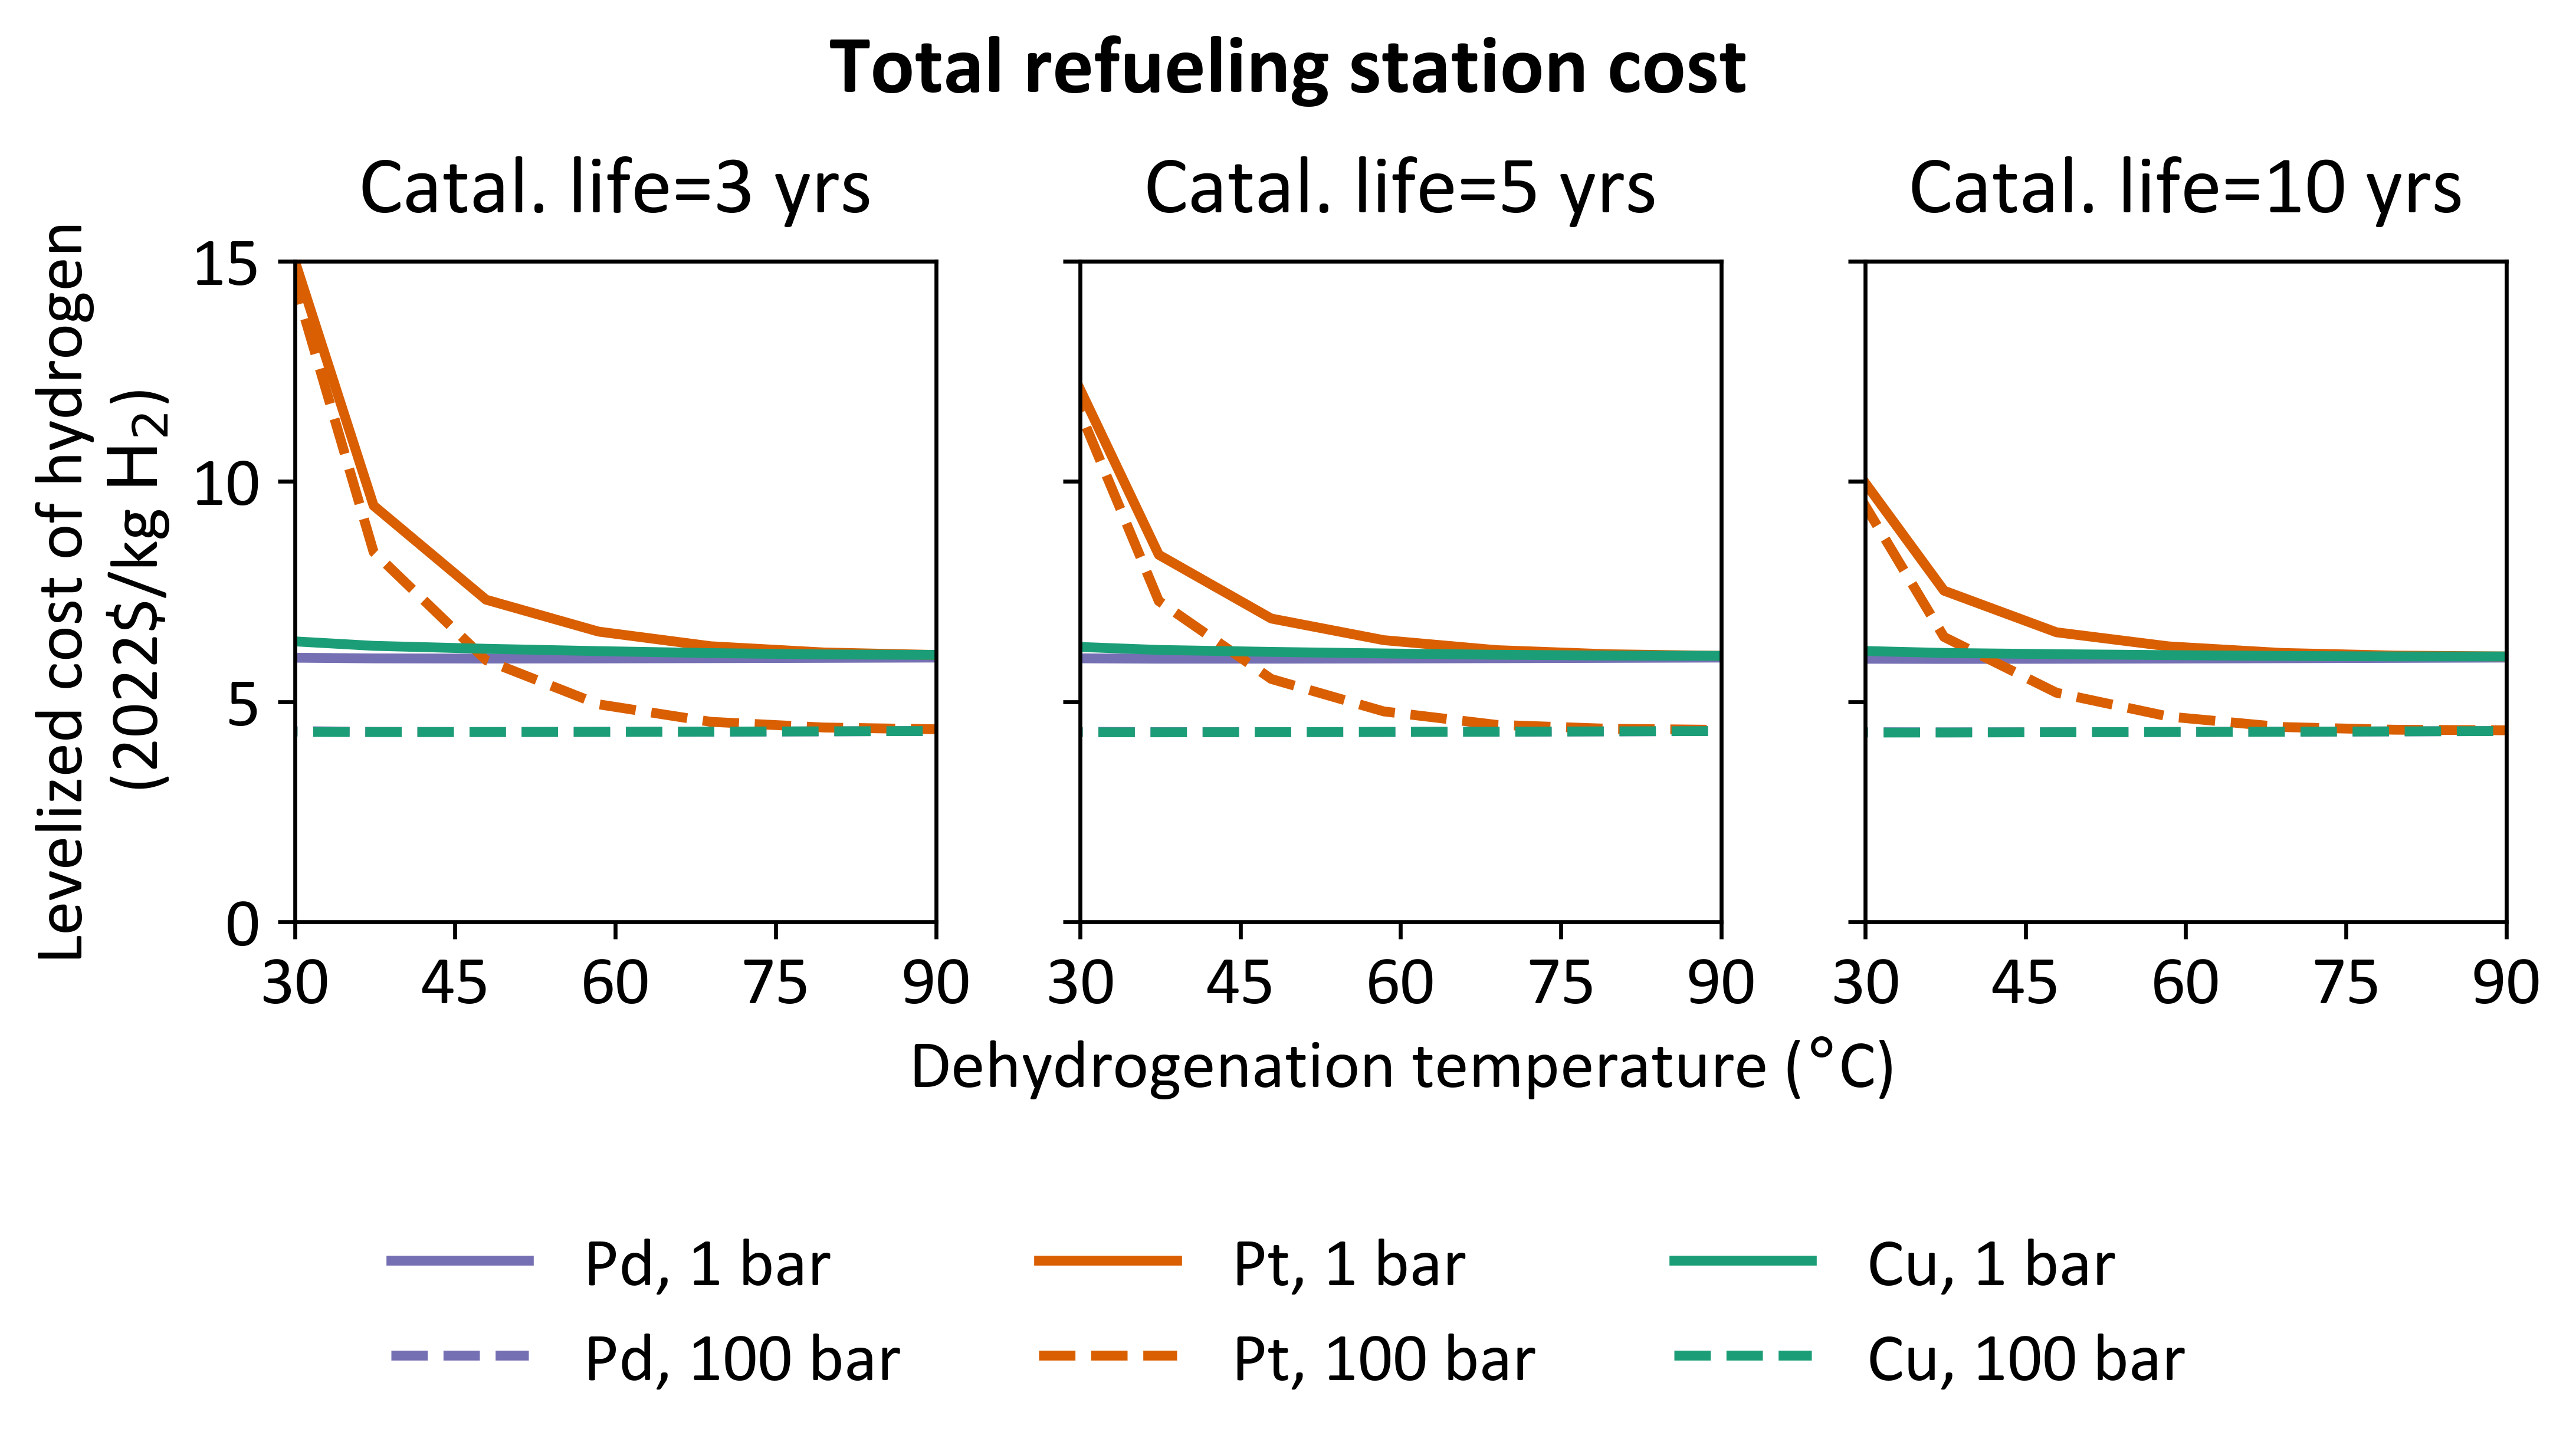

In [15]:
# plot total refueling station cost as function of 
# temperature and pressure for multiple catalysts

# create subplots
fig, axes = plt.subplots(
    figsize=(7.5, 3.5),
    ncols=len(folders), 
    sharey=True,
    layout='tight',
    dpi=600
    )

# fill subplots
for i in range(len(folders)):

    # catalyst lifetime to plot
    life_yrs = list(folders)[i]
    
    # filter results by catalyst lifetime
    df_stn_tot_pres = df_stn_tot_pres_all.loc[
        df_stn_tot_pres_all['catalyst life (yr)'] == life_yrs].copy()

    # pivot dataframe
    df_stn_tot_pivot = df_stn_tot_pres.pivot(
        columns=['catalyst, pressure'],
        index='dehydr. reaction temperature (C)',
        values='$/kg H2'
        )

    for catal in colors_catal.keys():
        
        # color for each catalyst
        color = colors_catal[catal]
    
        for pres in linestyles_pres.keys():
            
            # column name to plot
            catal_pres = catal + ', ' + str(int(pres)) + ' bar'
            
            # line style for each pressure
            linestyle = linestyles_pres[pres]
        
            # plot total refueling station cost ($/kg H2)
            df_stn_tot_pivot[catal_pres].plot(
                ax=axes[i],
                linewidth=2.0,
                color=color,
                linestyle=linestyle,
                xticks=np.linspace(30, 90, 5),
                xlim=(30, 90),
                xlabel='',
                ylabel='Levelized cost of hydrogen\n' + \
                    '({:0.0f}\\$/kg'.format(output_dollar_year) + \
                    ' ${H_2}$)',
                yticks=np.arange(0, 101, 5),
                ylim=(0, 15)
                )

            # update subplot title
            axes[i].set_title(
                'Catal. life=' + life_yrs,
                pad=10
            )

# update x-axis label
axes[1].set_xlabel('Dehydrogenation temperature ($\\degree$C)')

# update figure title
fig.suptitle(
    'Total refueling station cost',
    fontweight='bold',
    y=0.92,
)

# add legend for figure
handles, labels = axes[-1].get_legend_handles_labels()

fig.legend(
    handles=handles, 
    labels=labels, 
    frameon=False, 
    bbox_to_anchor=(0.5, 0), 
    ncols=3,
    loc='upper center'
    )

# save plot
plt.savefig(
    'total station cost vs catal life.svg',
    bbox_inches='tight'
    )

# show plot
plt.show()